# Explore here

In [65]:
#Los "IMPORTS"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif

import pickle

from pickle import dump

In [66]:
#Cargamos el modelo del proyecto anterior
with open("/workspaces/Leonel_Ponce_Random_forest_Proy/src/dataset.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [67]:
# Creamos modelos
model1 = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=20, max_depth=5)
model2 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=20, max_depth=10)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
#Predecimos (pred_1)
y_pred1_test = model1.predict(X_test)
y_pred1_train = model1.predict(X_train)

In [69]:
#Más predicciones (pred_2)
y_pred2_test = model2.predict(X_test)
y_pred2_train = model2.predict(X_train)

In [70]:
#Comparamos ambos train-test
def calcular_metricas(nombre, y_train, y_test, y_pred_train, y_pred_test):
    return {
        "Modelo": nombre,
        "Accuracy train": accuracy_score(y_train, y_pred_train),
        "Accuracy test": accuracy_score(y_test, y_pred_test),
        "F1 train": f1_score(y_train, y_pred_train, average="micro"),
        "F1 test": f1_score(y_test, y_pred_test, average="micro"),
        "Precision train": precision_score(y_train, y_pred_train, average="micro"),
        "Precision test": precision_score(y_test, y_pred_test, average="micro"),
        "Recall train": recall_score(y_train, y_pred_train, average="micro"),
        "Recall test": recall_score(y_test, y_pred_test, average="micro"),
}

resultados = []
resultados.append(calcular_metricas("Rf_300_prof5", y_train, y_test, y_pred1_train, y_pred1_test))
resultados.append(calcular_metricas("Rf_100_prof10", y_train, y_test, y_pred2_train, y_pred2_test))

df_resultados = pd.DataFrame(resultados).set_index("Modelo")
print(df_resultados)

               Accuracy train  Accuracy test  F1 train   F1 test  \
Modelo                                                             
Rf_300_prof5         0.851792       0.733766  0.851792  0.733766   
Rf_100_prof10        0.988599       0.746753  0.988599  0.746753   

               Precision train  Precision test  Recall train  Recall test  
Modelo                                                                     
Rf_300_prof5          0.851792        0.733766      0.851792     0.733766  
Rf_100_prof10         0.988599        0.746753      0.988599     0.746753  


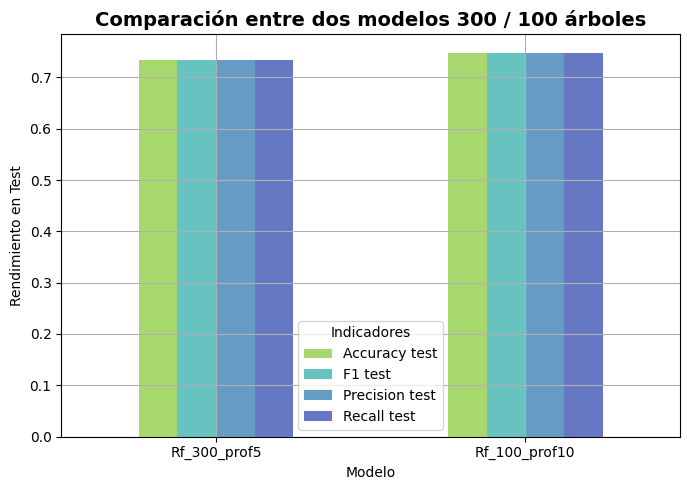

In [71]:
#Generamos gráfico para poder ver la comparativa (aunque son milimétricamente iguales)
df_resultados[["Accuracy test","F1 test","Precision test","Recall test"]].plot(kind="bar", color=["#a8d86d", "#66c3c0", "#669cc3", "#6677c3"], figsize=(7,5), grid=True)
plt.title("Comparación entre dos modelos 300 / 100 árboles", fontsize=14, fontweight="bold")
plt.ylabel("Rendimiento en Test")
plt.xticks(rotation=0)
plt.legend(title="Indicadores")
plt.tight_layout()
plt.show()

In [72]:
200 / 100
                Accuracy Train  Accuracy Test  F1 Train   F1 Test  \
Modelo                                                              
RF_300_depth5         0.851792       0.733766  0.851792  0.733766   
RF_100_depth10        0.988599       0.746753  0.988599  0.746753   

                Precision Train  Precision Test  Recall Train  Recall Test  
Modelo                                                                      
RF_300_depth5          0.851792        0.733766      0.851792     0.733766  
RF_100_depth10         0.988599        0.746753      0.988599     0.746753  

IndentationError: unexpected indent (1945173129.py, line 2)

In [ ]:
300 / 100

Accuracy Train  Accuracy Test  F1 Train   F1 Test  \
Modelo                                                              
RF_300_depth5         0.851792       0.753247  0.851792  0.753247   
RF_100_depth10        0.988599       0.746753  0.988599  0.746753   

                Precision Train  Precision Test  Recall Train  Recall Test  
Modelo                                                                      
RF_300_depth5          0.851792        0.753247      0.851792     0.753247  
RF_100_depth10         0.988599        0.746753      0.988599     0.746753

Conclusión:
Como se puede apreciar apenas se mueve el resultado, claramente tiene overfit (ya lo decía antes cuando lo había terminado, normal se arrastrase ahora de manera magnificada), si bien, mientras más árboles mejoran los resultados, pero si doy más profundidad memoriza más rapido...

ps. guardé los resultados en cajitas de ejecutar y no en markdown porque no se guardaban en "orden" sino como una tira de texto